In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
patient_notes_file = './data/patient_notes/patient_notes.csv' 
feature_file = './data/features.csv' 
train_file = './data/train.csv' 
test_file = './data/test.csv' 

## Explore Features 

In [7]:
features = pd.read_csv(feature_file)

In [8]:
features.describe()

,feature_num,case_num
count,143.000000,143.000000
mean,466.440559,4.594406
std,293.332543,2.929303
min,0.000000,0.000000
25%,209.500000,2.000000
50%,502.000000,5.000000
75%,707.500000,7.000000
max,916.000000,9.000000


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   feature_num   143 non-null    int64 
 1   case_num      143 non-null    int64 
 2   feature_text  143 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [10]:
features.head(10) 

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded
5,5,0,No-hair-changes-OR-no-nail-changes-OR-no-tempe...
6,6,0,Adderall-use
7,7,0,Shortness-of-breath
8,8,0,Caffeine-use
9,9,0,heart-pounding-OR-heart-racing


In [13]:
feat = features[['feature_num', 'case_num']].groupby('case_num') 

In [15]:
feat.count() 

,feature_num
case_num,
0,13
1,13
2,17
3,16
4,10
5,18
6,12
7,9
8,18


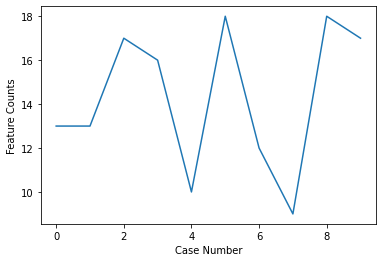

In [23]:
plt.plot(feat.count().index.values, feat.count()['feature_num'].values)
plt.xlabel('Case Number')
plt.ylabel('Feature Counts') 
plt.show()

In [20]:
feat.count().index.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [25]:
feat.count().mean()

feature_num    14.3
dtype: float64

In [11]:
features['text_length'] = features['feature_text'].apply(lambda x: len(str(x))) 

In [16]:
# features[['text_length', 'case_num']].groupby('case_num').count() 

In [18]:
features[['text_length', 'case_num']].groupby('case_num').mean() 

,text_length
case_num,
0,23.846154
1,26.692308
2,22.294118
3,25.687500
4,17.500000
5,26.333333
6,24.916667
7,19.111111
8,22.500000


In [19]:
features['text_length'].mean() 

23.20979020979021

## Explore patient_notes 

In [20]:
patient_notes = pd.read_csv(patient_notes_file) 

In [21]:
patient_notes.head() 

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [25]:
notes = patient_notes['pn_history'][0] 

In [26]:
print(notes)

17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment
-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav
-associated with dispnea on exersion and rest,stressed out about school
-reports fe feels like his heart is jumping out of his chest
-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam
-pmh:non,meds :aderol (from a friend),nkda
-fh:father had MI recently,mother has thyroid dz
-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school
-sh:no std


In [27]:
notes = patient_notes['pn_history'][1]
print(notes)

17 yo male with recurrent palpitations for the past 3 mo lasting about 3 - 4 min, it happened about 5 - 6 times since the beginning. One time durign a baskeball game two days ago light headedness, pressure in the chest, catching breath, but no fainting. During teh episodes no sweating. No diarrhea, no heat intolerance, no weight loss. Has tried aterol to be able to better concentrate, has received it from his roommate. .


## Explore test

## Explore train 